In [1]:
import pandas as pd

df = pd.read_csv("zillow_cleaned.csv")
df.shape
df.dtypes

df.isnull().mean().sort_values(ascending=False)

df.describe()

summary_cols = [
    "taxvaluedollarcnt",
    "calculatedfinishedsquarefeet",
    "bedroomcnt",
    "bathroomcnt",
    "yearbuilt",
]

df[summary_cols].describe().T[["mean", "50%", "std", "min", "max"]]

,mean,50%,std,min,max
taxvaluedollarcnt,459884.973773,355000.0,421691.052101,1000.0,3755409.0
calculatedfinishedsquarefeet,1767.196027,1555.0,826.104685,128.0,5954.0
bedroomcnt,3.082103,3.0,0.993875,0.0,11.0
bathroomcnt,2.267020,2.0,0.908387,0.0,10.0
yearbuilt,1967.154082,1966.0,22.616954,1878.0,2016.0


# Data Overview

## Data Sources
The dataset used in this project is derived from Zillow residential property data and was originally obtained from Kaggle during an earlier phase of the Integrated Capstone Project. The data represents aggregated housing and property characteristics across multiple U.S. counties and ZIP codes. It contains no personally identifiable information and is intended for research and analytical purposes.

## Data Collection Method
The data was downloaded in CSV format from a public Kaggle repository and loaded into the analysis environment using Python and the pandas library. Prior to analysis, the dataset was cleaned and standardized in a previous semester to remove inconsistencies and ensure usability. The cleaned dataset (`zillow_cleaned.csv`) is reused in this phase of the project to maintain consistency across analyses.

## Data Description
The cleaned dataset contains **64,894 observations and 19 variables**. All variables are stored as numeric values and include a mix of continuous, discrete, and geographic identifier features describing physical housing characteristics and location. Key variables include square footage, number of bedrooms and bathrooms, year built, lot size, and total assessed property value. The target variable for modeling is `taxvaluedollarcnt`, which represents the assessed value of a property in U.S. dollars.

The dataset primarily reflects single-family residential properties, which may limit applicability to multi-unit or commercial housing.

### Summary Statistics (Selected Variables)

| Variable | Mean | Median | Std | Min | Max |
|--------|------|--------|-----|-----|-----|
| taxvaluedollarcnt | 459,884.97 | 355,000 | 421,691.05 | 1,000 | — |
| calculatedfinishedsquarefeet | 1,767.20 | 1,555 | 826.10 | 128 | 5,954 |
| bedroomcnt | 3.08 | 3 | 0.99 | 0 | 11 |
| bathroomcnt | 2.27 | 2 | 0.91 | 0 | 10 |
| yearbuilt | 1,967.15 | 1,966 | 22.62 | 1,878 | — |

*Summary statistics are selectively reported for variables most relevant to the analysis. Maximum values are omitted for selected variables where extreme values provide limited interpretive value.*

## Data Dictionary

| Variable Name | Type | Description | Example Value |
|--------------|------|-------------|---------------|
| taxvaluedollarcnt | float | Assessed total property value in USD | 525000 |
| calculatedfinishedsquarefeet | float | Total finished living area in square feet | 1800 |
| bedroomcnt | float | Number of bedrooms in the property | 3 |
| bathroomcnt | float | Number of bathrooms in the property | 2.5 |
| lotsizesquarefeet | float | Lot size in square feet | 6000 |
| yearbuilt | float | Year the property was constructed | 1987 |
| regionidzip | float | ZIP code identifier for the property | 90210 |
| latitude | float | Geographic latitude coordinate | 34.12 |
| longitude | float | Geographic longitude coordinate | -118.41 |

## Data Quality Assessment
The dataset was cleaned prior to this phase of the project and contains no missing values across the variables used in analysis. All features are consistently typed as numeric values, enabling efficient statistical analysis and modeling. Because the dataset was preprocessed prior to this phase of the project, no duplicate records or structural inconsistencies were detected. While the data quality is high, it is important to note that assessed values may not perfectly reflect market transaction prices, which introduces a potential limitation for predictive accuracy.

## Ethical Considerations
The dataset is publicly available and contains no personally identifiable information, minimizing privacy concerns. However, ethical considerations remain regarding potential geographic and socioeconomic bias. Properties from higher-value regions may be overrepresented, which could influence model predictions and reduce generalizability to lower-income or underrepresented areas. Additionally, assessed property values may reflect historical or institutional valuation practices rather than true market conditions. These limitations are acknowledged and considered when interpreting analytical results.

# Introduction and Problem Definitions

## Project Background and Context
Accurately estimating residential property values is critical for stakeholders across the real estate ecosystem, including homeowners, buyers, investors, and local governments. Housing prices are influenced by a complex combination of structural property features, geographic location, and historical valuation practices. Traditional appraisal methods often rely on limited comparables or expert judgment, which can introduce subjectivity and lag behind rapidly changing market conditions. Data-driven modeling approaches offer the opportunity to improve consistency, transparency, and scalability in property valuation.

## Problem Statement
The central problem addressed in this project is how to accurately predict residential property values using available housing and location-related features. Specifically, the goal is to develop predictive models that estimate assessed home values based on property characteristics such as size, age, lot area, and geographic identifiers. Improving prediction accuracy can help stakeholders better understand the factors driving property valuations and support more informed decision-making.

## Stakeholders and Objectives
Key stakeholders for this project include real estate analysts, homeowners, buyers, and municipal decision-makers. From a business perspective, stakeholders are interested in reliable valuation estimates that can support pricing decisions, tax assessments, and investment analysis. From a technical perspective, the objective is to evaluate and compare machine learning models capable of capturing non-linear relationships in housing data while maintaining interpretability.

## Research Questions
This project is guided by the following research questions:
- Which property and location features are most influential in predicting residential property values?
- How do different machine learning models compare in terms of predictive performance for housing valuation?
- To what extent can ensemble models improve prediction accuracy over simpler baseline approaches?

## Success Criteria
Model performance is evaluated using quantitative error-based metrics appropriate for continuous outcomes, including Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE). A successful model is defined as one that meaningfully reduces prediction error relative to a baseline model while maintaining stability across validation data. In addition, feature importance and model interpretability are considered secondary success criteria to support stakeholder understanding of valuation drivers.

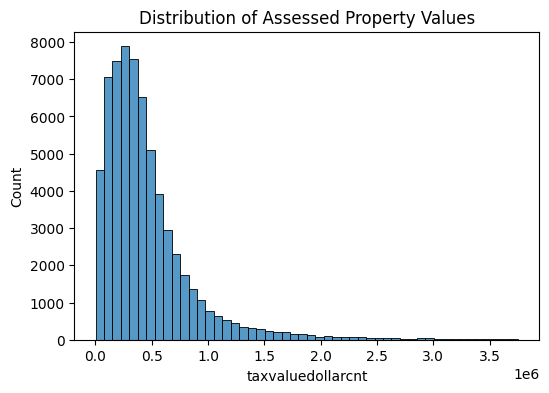

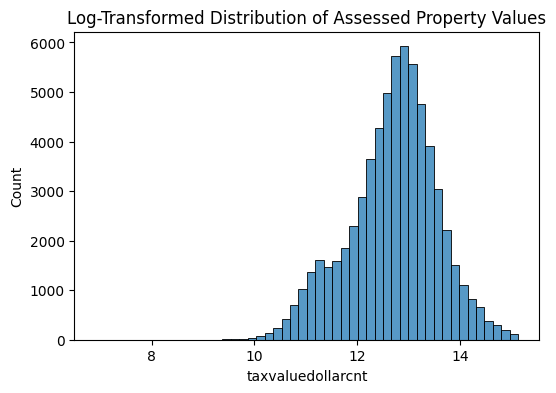

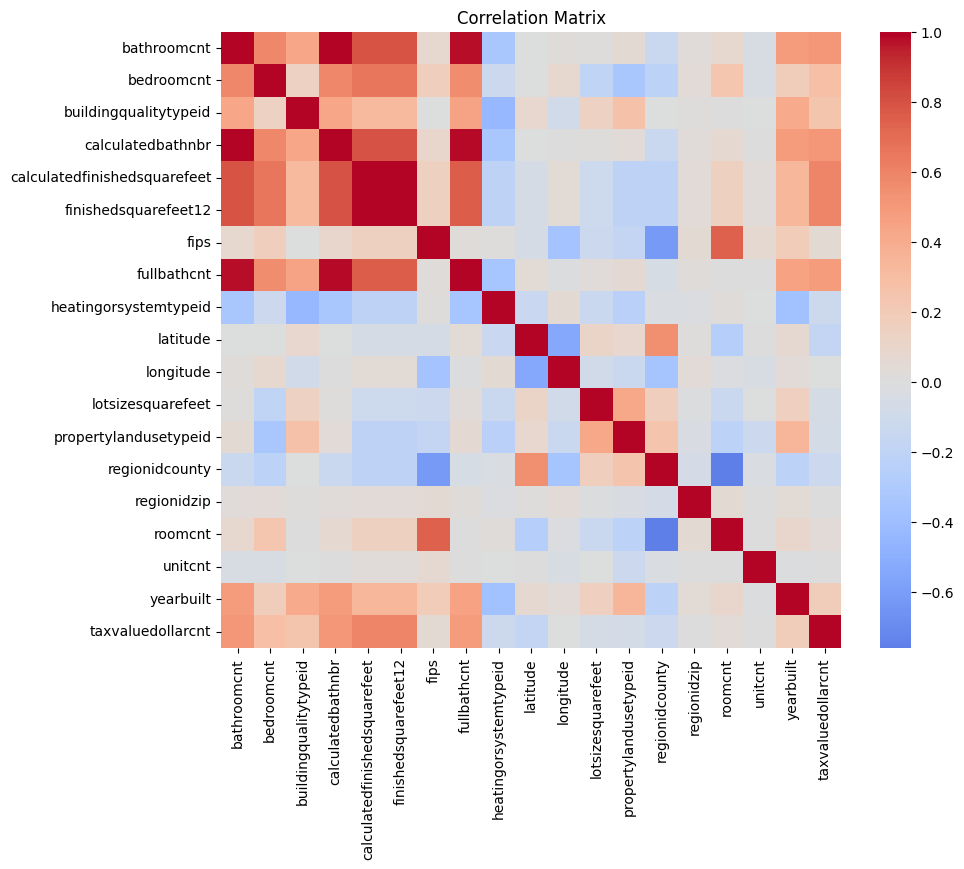

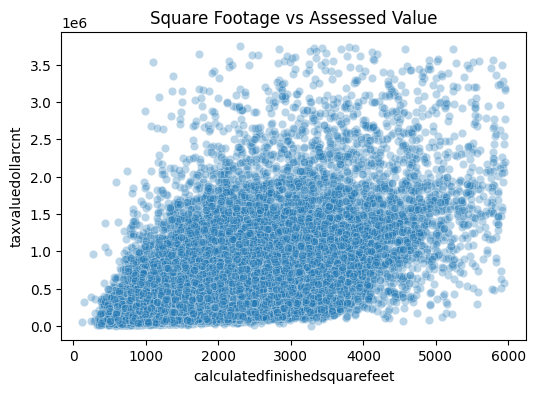

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv("zillow_cleaned.csv")
df.shape

# 1. Histogram of target
plt.figure(figsize=(6,4))
sns.histplot(df["taxvaluedollarcnt"], bins=50)
plt.title("Distribution of Assessed Property Values")
plt.show()

# 2. Log-transformed histogram
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df["taxvaluedollarcnt"]), bins=50)
plt.title("Log-Transformed Distribution of Assessed Property Values")
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

# 4. Scatterplot
plt.figure(figsize=(6,4))
sns.scatterplot(
    x="calculatedfinishedsquarefeet",
    y="taxvaluedollarcnt",
    data=df,
    alpha=0.3
)
plt.title("Square Footage vs Assessed Value")
plt.show()

## Data Cleaning, Preprocessing, and Exploratory Data Analysis

The distribution of taxvaluedollarcnt exhibited strong positive skewness, with a long right tail representing high-value properties. The mean ($459,885) exceeds the median ($355,000), further confirming skewness. A log transformation produced a more symmetric distribution, suggesting improved suitability for regression modeling.

Correlation analysis indicated that calculatedfinishedsquarefeet, finishedsquarefeet12, bathroomcnt, and calculatedbathnbr had the strongest positive relationships with assessed property value. This suggests that interior living area and bathroom count are primary structural drivers of valuation. Geographic coordinates and unit counts exhibited weaker linear relationships.

A scatterplot of square footage versus assessed value demonstrated a clear upward trend, confirming a positive relationship between home size and value. Variability increased among larger homes, suggesting that additional location or quality factors may influence pricing dispersion.

## Summary of Findings

Overall, exploratory analysis suggests that interior square footage and bathroom count are among the strongest predictors of assessed value. The pronounced skewness of the target variable motivated consideration of log transformation prior to modeling.